<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the Data from the files user, movie and rating

In [2]:
#Load the user data separated with :: and with missing headers
df_user = pd.read_table("users.dat",sep='::',engine='python', header=None,
                        names = ['UserID','Gender','Age','Occupation','Zip-code'])
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
#Load the movie data separated with :: and with missing headers
df_movie = pd.read_table("movies.dat", sep="::",engine='python', header=None, names = ['MovieID','Title','Genres'])
df_movie.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Load the rating data separated with :: and with missing headers
df_rating = pd.read_table("ratings.dat", sep="::",engine='python', header=None, names=['UserID','MovieID','Rating','Timestamp'])
df_rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


#### Visualize user age distribution

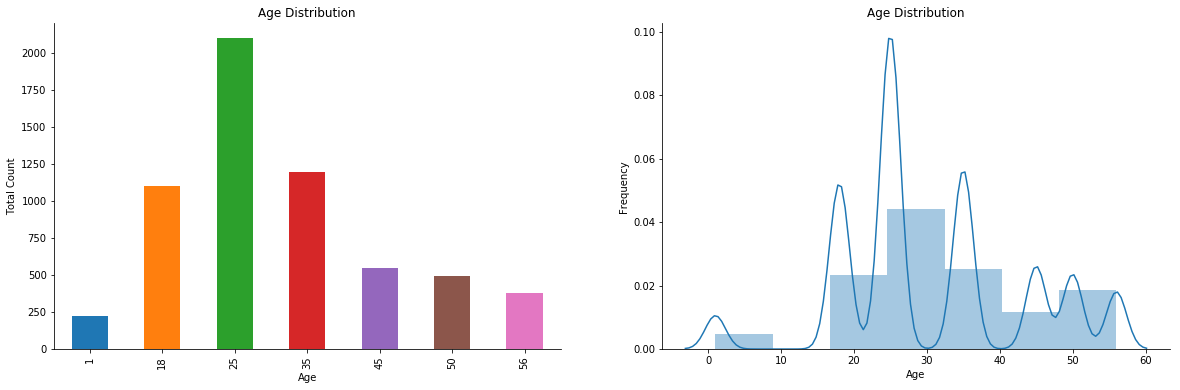

In [5]:
# Visualize user age distribution
f,ax=plt.subplots(1,2,figsize=(20,6))
df_user['Age'].value_counts().sort_index().plot(kind='bar',ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Total Count")

sns.distplot(df_user['Age'],bins=7,ax=ax[1])
ax[1].set_title("Age Distribution")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Frequency")
sns.despine()

#### Visualize overall rating by users

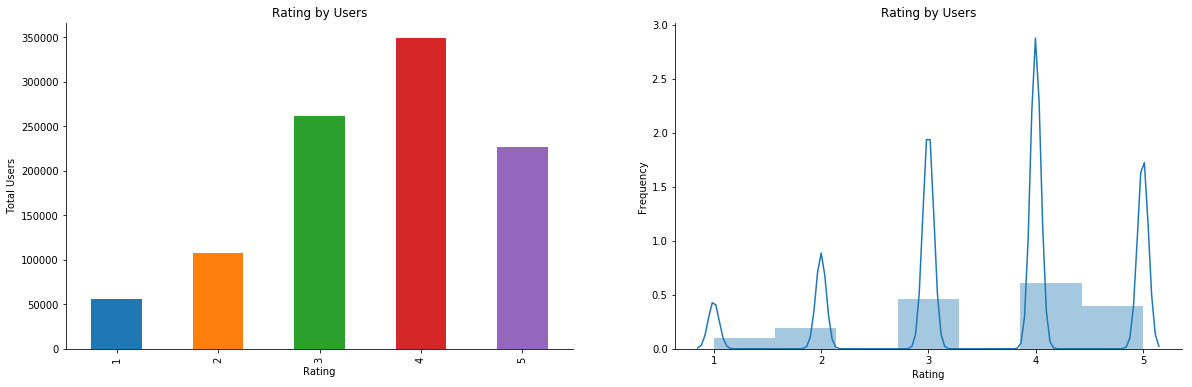

In [6]:
# Visualize overall rating by users
f,ax=plt.subplots(1,2,figsize=(20,6))
df_rating['Rating'].value_counts().sort_index().plot(kind='bar',ax=ax[0])
ax[0].set_title('Rating by Users')
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Total Users")

sns.distplot(df_rating['Rating'],bins=7,ax=ax[1])
ax[1].set_title("Rating by Users")
ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Frequency")
sns.despine()

#### Find and visualize the user rating of the movie “Toy Story”

In [7]:
# Find and visualize the user rating of the movie “Toy Story”
df_movie_TT = df_movie[df_movie['Title'].str.contains("Toy Story \(")]
df_movie_rating_TT = pd.merge(df_movie_TT[['MovieID']], df_rating[['MovieID', 'UserID', 'Rating']], on="MovieID", how="inner")
df_movie_rating_TT.head()

,MovieID,UserID,Rating
0,1,1,5
1,1,6,4
2,1,8,4
3,1,9,5
4,1,10,5


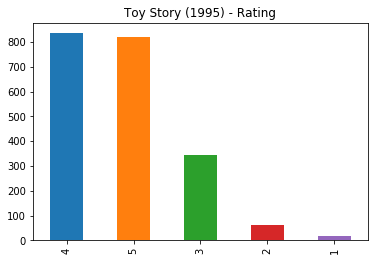

In [8]:
df_movie_rating_TT['Rating'].value_counts().plot(kind='bar',title='Toy Story (1995) - Rating')

#### Find and visualize the viewership of the movie “Toy Story” by age group

In [9]:
# Find and visualize the viewership of the movie “Toy Story” by age group
df_movie_viewer_TT = pd.merge(df_movie_rating_TT, df_user, on="UserID", how="inner")
df_movie_viewer_TT.head()

,MovieID,UserID,Rating,Gender,Age,Occupation,Zip-code
0,1,1,5,F,1,10,48067
1,1,6,4,F,50,9,55117
2,1,8,4,M,25,12,11413
3,1,9,5,M,25,17,61614
4,1,10,5,F,35,1,95370


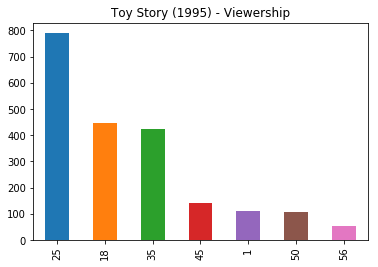

In [10]:
df_movie_viewer_TT['Age'].value_counts().plot(kind='bar',title='Toy Story (1995) - Viewership')

#### Find and visualize the top 25 movies by viewership rating

In [11]:
# Find and visualize the top 25 movies by viewership rating
df_rating_5 = df_rating[df_rating['Rating'] == 5]
df_movie_rating_5 = pd.merge(df_movie[['MovieID', 'Title']], df_rating_5[['MovieID', 'Rating']], on="MovieID", how="inner")
df_movie_rating_5.groupby(['MovieID','Title'])['Rating'].count().nlargest(25)

MovieID  Title                                                
2858     American Beauty (1999)                                   1963
260      Star Wars: Episode IV - A New Hope (1977)                1826
1198     Raiders of the Lost Ark (1981)                           1500
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    1483
527      Schindler's List (1993)                                  1475
858      Godfather, The (1972)                                    1475
318      Shawshank Redemption, The (1994)                         1457
2571     Matrix, The (1999)                                       1430
2028     Saving Private Ryan (1998)                               1405
2762     Sixth Sense, The (1999)                                  1385
593      Silence of the Lambs, The (1991)                         1350
608      Fargo (1996)                                             1278
110      Braveheart (1995)                                        1206
296      Pulp 

#### Find the rating for a particular user of user id = 2696
   **Visualize the rating data by user of user id = 2696**

In [12]:
# Find the rating for a particular user of user id = 2696
df_user_rating_2696 = df_rating[df_rating['UserID']==2696]
df_movie_rating_2696 = pd.merge(df_movie, df_user_rating_2696, on="MovieID", how="inner")
df_movie_rating_2696.shape

(20, 6)

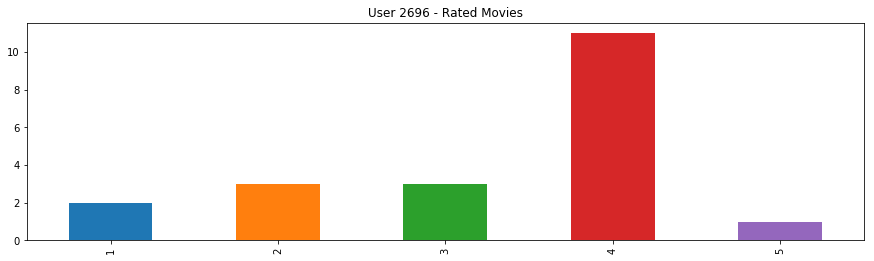

In [13]:
# Visualize the rating data by user of user id = 2696
df_movie_rating_2696['Rating'].value_counts().sort_index().plot(kind='bar',figsize=(15,4),title='User 2696 - Rated Movies')

### Perform machine learning on first 500 extracted records

In [14]:
df_movie_rating = pd.merge(df_movie[['MovieID']], df_rating[['UserID', 'Rating', 'MovieID']], on="MovieID", how="inner")
df_movie_viewer_rating = pd.merge(df_movie_rating, df_user[['UserID', 'Age', 'Occupation']], on="UserID", how="inner")

In [15]:
#step2
df_movie_viewer_rating.drop('UserID', inplace=True, axis=1)
df_movie_viewer_rating.head()

,MovieID,Rating,Age,Occupation
0,1,5,1,10
1,48,5,1,10
2,150,5,1,10
3,260,4,1,10
4,527,5,1,10


In [16]:
df_movie_viewer_rating.shape

(1000209, 4)

In [17]:
# split the data into test and train, select the first 500 records
from sklearn.model_selection import train_test_split
train, test =train_test_split(df_movie_viewer_rating[0:500], test_size = 0.30, random_state = 1234)

In [18]:
#Import the required libraries
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
X_train = train.drop("Rating", axis=1)
y_train = train["Rating"]
X_test = test.drop("Rating", axis=1)
y_test = test["Rating"]

In [20]:
classifiers = {
    "KNeighborsClassifier   " : KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan'),
    "DecisionTreeClassifier " : DecisionTreeClassifier(max_depth = 6),
    "RandomForestClassifier " : RandomForestClassifier(n_estimators = 10, random_state = 0),
    "Naive Bayes            " : GaussianNB(),
    "RBF SVM                " : SVC(gamma = 2)
}

In [21]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print("{:<15}| score = {:.4f}".format(name, score))

KNeighborsClassifier   | score = 0.3200
DecisionTreeClassifier | score = 0.3333
RandomForestClassifier | score = 0.3733
Naive Bayes            | score = 0.4200
RBF SVM                | score = 0.4133


** ------------------------------------------------------------------------------------------------------------**

Movie, Age and Occupation dosen't seems to be better predictor of Rating.

Among above **Naive Bayes** seems to be better predictor of Rating than others

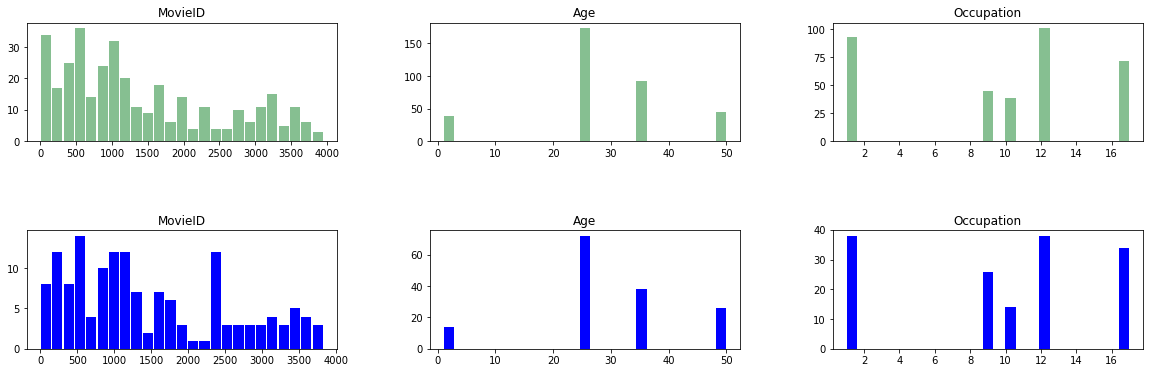

In [22]:
# Visualize user age distribution
f,ax=plt.subplots(2,3,figsize=(20,6))

#Histograms using Training Data
train.hist(column= 'MovieID', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
train.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
train.hist(column='Occupation', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][2])

#Histograms using Testing Data
test.hist(column= 'MovieID', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9, ax=ax[1][0])
test.hist(column='Age', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9, ax=ax[1][1])
test.hist(column='Occupation', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.9, ax=ax[1][2])
plt.subplots_adjust(hspace=0.75)